In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import CenteredNorm

from Common import *

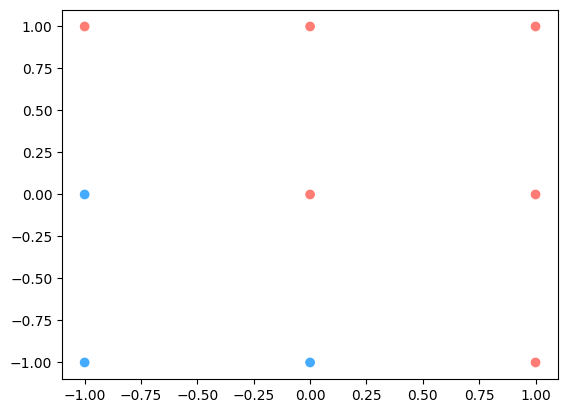

In [2]:
plt.scatter(input[:, 0], input[:, 1], c=expected, cmap=cmap)

In [16]:
W0 = np.array([[0.61275508, 0.98539237, 0.27266151],
               [-0.47399039, 0.66266751, -0.72721264]])
W1 = np.array([[0.96787958],
               [-0.80183257],
               [0.94478099]])

expected = expected.reshape(9, 1)

In [17]:
def run(i):
  x1 = np.matmul(i, W0)
  x2 = np.matmul(x1, W1)
  return (x2, x1)

In [57]:
x2, x1 = run(input)
loss = abs(expected - x2).sum()
loss

#np.column_stack([x2, expected])

10.838089697399669

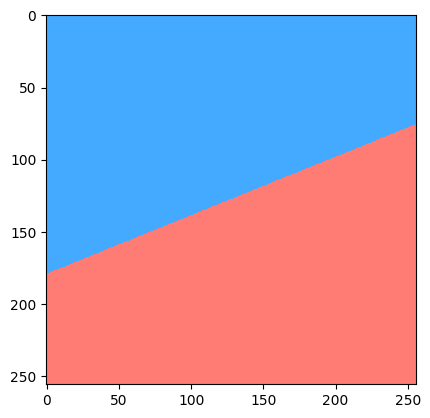

In [58]:
#plt.scatter(test[:, 0], test[:, 1], c=run(test)[0].squeeze(), cmap=cmap)
#plt.imshow(run(test)[0].reshape(256, 256), cmap=cmap, norm=CenteredNorm(0, 0.1))
plt.imshow(run(test)[0].reshape(256, 256), cmap=cmap)

Chain rule for backprop:
dL/dW1 = dL/dx2 * dx2/dW1 = dL/dx2 * x1
dL/dx1 = dL/dx2 * dx2/dx1
dL/dW0 = dL/dx1 * dx1/dW0 = dL/dx1 * x

In [59]:
# For each sample (the rows), in which direction does x2 need to be nudged
dLdX2 = -np.sign(expected - x2)
dLdX2

array([[-1.],
       [-1.],
       [-1.],
       [ 1.],
       [-0.],
       [-1.],
       [ 1.],
       [ 1.],
       [ 1.]])

In [60]:
f = lambda i, j: np.outer(i, j)
vecF = np.vectorize(f, signature='(m),(n)->(m,n)')

# For each sample, in which direction do each of the W1 weights need to be nudged
dLdW1PerSample = vecF(x1, dLdX2)
# Sum over samples to get overall update to W1
dLdW1 = dLdW1PerSample.sum(0)
dLdW1

array([[ 0.10249869],
       [-4.80154406],
       [ 2.39194859]])

In [61]:
#dLdX1 = np.outer(dLdX2, W1)
dLdX1 = dLdX2 @ W1.T
dLdX1

array([[-0.92612794,  0.5822663 , -0.81414187],
       [-0.92612794,  0.5822663 , -0.81414187],
       [-0.92612794,  0.5822663 , -0.81414187],
       [ 0.92612794, -0.5822663 ,  0.81414187],
       [ 0.        ,  0.        ,  0.        ],
       [-0.92612794,  0.5822663 , -0.81414187],
       [ 0.92612794, -0.5822663 ,  0.81414187],
       [ 0.92612794, -0.5822663 ,  0.81414187],
       [ 0.92612794, -0.5822663 ,  0.81414187]])

In [62]:
matrix1 = np.random.rand(9, 5)
matrix2 = np.random.rand(5, 5)

matrix1 @ matrix2

array([[1.04481807, 0.31745438, 0.82544582, 0.87513112, 1.1949496 ],
       [1.21446138, 0.50545856, 1.03582293, 1.23813486, 1.44082589],
       [1.37003561, 0.98722339, 1.15865512, 2.2125403 , 1.98136985],
       [1.27187035, 0.99683809, 1.13878567, 1.77772684, 1.71009815],
       [0.98967103, 0.7348351 , 1.01004381, 1.72741333, 1.4592493 ],
       [0.81211541, 0.59206397, 0.82268375, 1.97877122, 1.45906952],
       [1.2436979 , 0.68396689, 1.48791045, 1.49465389, 1.53364706],
       [1.70821284, 1.10827819, 0.86862412, 1.28621857, 1.79240986],
       [0.71050344, 0.7741153 , 0.84341619, 2.15663453, 1.45641883]])

In [63]:
dLdW0PerSample = vecF(input, dLdX1)
dLdW0 = dLdW0PerSample.sum(0)
dLdW0

array([[-1.85225588,  1.16453261, -1.62828373],
       [-5.55676764,  3.49359782, -4.88485119]])

In [56]:
e = 1e-2
W0 -= e * dLdW0
W1 -= e * dLdW1

W0
W1

array([[ 0.68855175,  0.92813008,  0.34396172],
       [-0.24660037,  0.49088065, -0.51331201]])

array([[ 0.92612794],
       [-0.5822663 ],
       [ 0.81414187]])